## Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Loading Model

In [ ]:
model  = tf.keras.models.load_model('trained_model.keras')

2024-02-10 21:18:26.223038: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-02-10 21:18:26.223058: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-02-10 21:18:26.223064: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-02-10 21:18:26.223112: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-10 21:18:26.223144: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

### Visualizaing Single Image of Test set

In [ ]:
!pip install opencv-python

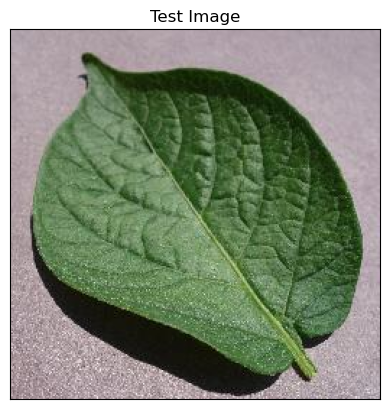

In [ ]:
import cv2
image_path = "test/test/PotatoHealthy1.JPG"
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Convert BGR image to RGB

#Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [ ]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 13ms/step


(array([[4.8984805e-16, 5.1034554e-12, 1.4121303e-19, 1.9514913e-07,
         7.9913952e-17, 3.1361239e-07, 2.2545740e-07, 9.5523495e-23,
         5.2343983e-22, 2.3204983e-24, 1.0458178e-26, 1.9644866e-19,
         5.8274523e-19, 1.2244020e-19, 4.8378222e-19, 4.1026015e-13,
         2.5884199e-14, 7.2122195e-17, 6.4710906e-12, 3.1383032e-10,
         1.5738648e-15, 1.8926709e-06, 9.9999738e-01, 1.4296070e-16,
         2.5511730e-11, 2.9906600e-23, 7.5664287e-22, 6.4112834e-16,
         3.9509998e-20, 1.0495185e-11, 5.4476612e-10, 3.2740015e-16,
         5.6810086e-18, 1.5760517e-15, 3.1117609e-14, 4.1529621e-22,
         2.8133198e-20, 2.1244498e-18]], dtype=float32),
 (1, 38))

In [ ]:
result_index = np.argmax(prediction)
result_index

22

In [ ]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

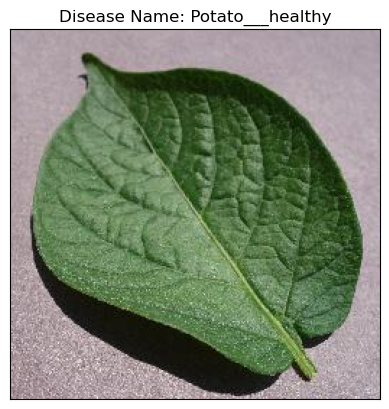

In [ ]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
model_prediction

'Potato___healthy'